In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path



In [39]:

# Create path and read csv file

batting_path = ("Resource/Batting.csv")
batting_df = pd.read_csv(batting_path)
# Display original DF

batting_df



,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102811,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
102812,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0
102813,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0
102814,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0


In [42]:
# Identify columns and reduce to batting specific

batting_df.columns




Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [43]:
batting_df_reduced = batting_df[["playerID", "yearID", "teamID", "G", "AB", "R", "H", "2B", "3B", "HR"]]

In [44]:
#Display reduced DF

batting_df_reduced


,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR
0,abercda01,1871,TRO,1,4,0,0,0,0,0
1,addybo01,1871,RC1,25,118,30,32,6,0,0
2,allisar01,1871,CL1,29,137,28,40,4,5,0
3,allisdo01,1871,WS3,27,133,28,44,10,2,2
4,ansonca01,1871,RC1,25,120,29,39,11,3,0
...,...,...,...,...,...,...,...,...,...,...
102811,zimmejo02,2016,DET,19,4,0,1,0,0,0
102812,zimmery01,2016,WAS,115,427,60,93,18,1,15
102813,zobribe01,2016,CHN,147,523,94,142,31,3,18
102814,zuninmi01,2016,SEA,55,164,16,34,7,0,12


In [45]:
# Split DF into pre Moneyball and Post Moneyball eras

batting_pre_mb_df = batting_df_reduced[(batting_df_reduced["yearID"]>1984) & (batting_df_reduced["yearID"]<2002)]
batting_post_mb_df = batting_df_reduced[batting_df_reduced["yearID"]>2001]


# Leave out rows before 1985

batting_df_current = batting_df_reduced[batting_df_reduced["yearID"]>1984]

batting_df_current


,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR
62239,aasedo01,1985,BAL,54,0,0,0,0,0,0
62240,abregjo01,1985,CHN,6,9,0,0,0,0,0
62241,ackerji01,1985,TOR,61,0,0,0,0,0,0
62242,adamsri02,1985,SFN,54,121,12,23,3,1,2
62243,agostju01,1985,CHA,54,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
102811,zimmejo02,2016,DET,19,4,0,1,0,0,0
102812,zimmery01,2016,WAS,115,427,60,93,18,1,15
102813,zobribe01,2016,CHN,147,523,94,142,31,3,18
102814,zuninmi01,2016,SEA,55,164,16,34,7,0,12


In [46]:
# Print amount of Teams

len(batting_df_current["teamID"].unique())


35

In [47]:
#Group DF by Team and find sum of total amount of hits per year.

team_hits_year = batting_df_current.groupby(["teamID", "yearID"])["H"].sum()
team_hits_year_df = team_hits_year.reset_index()

team_hits_sorted_df = team_hits_year_df.sort_values(by="yearID", ascending=True)

team_hits_sorted_df


,teamID,yearID,H
231,CLE,1985,1465
515,MON,1985,1342
338,HOU,1985,1457
27,ATL,1985,1359
695,SDN,1985,1405
...,...,...,...
566,NYA,2016,1378
26,ARI,2016,1479
262,CLE,2016,1435
758,SEA,2016,1446


In [48]:
# Use groupby to isolate Home Runs

team_hr_year = batting_df_current.groupby(["teamID", "yearID"])["HR"].sum().reset_index()
team_hr_sorted_df = team_hr_year.sort_values(by="yearID", ascending=True)
# Use groupby to isolate hits in pre and post Moneyball eras

team_hits_pre_mb = batting_pre_mb_df.groupby(["teamID", "yearID"])["H"].sum()
team_hits_pre_mb = pd.DataFrame(team_hits_pre_mb).reset_index()
team_hits_post_mb = batting_post_mb_df.groupby(["teamID", "yearID"])["H"].sum()
team_hits_post_mb = pd.DataFrame(team_hits_post_mb).reset_index()


In [49]:
# View Dataframe

team_hits_pre_mb


,teamID,yearID,H
0,ANA,1997,1531
1,ANA,1998,1530
2,ANA,1999,1404
3,ANA,2000,1574
4,ANA,2001,1447
...,...,...,...
463,TOR,1997,1333
464,TOR,1998,1482
465,TOR,1999,1580
466,TOR,2000,1562


In [51]:
# Write CSV files to Output folder

team_hits_sorted_df.to_csv("Output/team_hits_year.csv",index=False,header=True)
team_hits_pre_mb.to_csv("Output/team_hits_pre_mb.csv",index=False, header=True)
team_hits_post_mb.to_csv("Output/team_hits_post_mb.csv",index=False, header=True)
team_hr_sorted_df.to_csv("Output/team_hr_year.csv",index=False, header=True)


In [52]:
# View CSV files as dataframe

pd.DataFrame(team_hits_pre_mb).reset_index()

,index,teamID,yearID,H
0,0,ANA,1997,1531
1,1,ANA,1998,1530
2,2,ANA,1999,1404
3,3,ANA,2000,1574
4,4,ANA,2001,1447
...,...,...,...,...
463,463,TOR,1997,1333
464,464,TOR,1998,1482
465,465,TOR,1999,1580
466,466,TOR,2000,1562


In [2]:
#create paths and read CSV files

salary_path = ("mlb_project1/adjusted_salary_output.csv")
batting_path = ("Output/team_hits_year.csv")

salary_df = pd.read_csv(salary_path)
batting_df = pd.read_csv(batting_path)

In [3]:
# View Dataframes

salary_df.head()


,yearID,teamID,salary,adjusted_salary
0,1985,ATL,14807000,34258061
1,1985,BAL,11560712,26747321
2,1985,BOS,10897560,25213026
3,1985,CAL,14427894,33380947
4,1985,CHA,9846178,22780507


In [4]:
batting_df.head()

,teamID,yearID,H
0,CLE,1985,1465
1,MON,1985,1342
2,HOU,1985,1457
3,ATL,1985,1359
4,SDN,1985,1405


In [5]:
# Merge Dataframes on Team and Year

hits_salary_df = pd.merge(salary_df, batting_df, on=["yearID", "teamID"])
y_min = 800000
y_max = 2500000


In [38]:
# Find min and max values for plotting

print(hits_salary_df["salary"].min())
print(hits_salary_df["salary"].max())

880000
231978886


In [8]:
# Create paths and read in CSV files for batting stats

hits_pre_path = ("Output/team_hits_pre_mb.csv")
hits_post_path = ("Output/team_hits_post_mb.csv")
team_records_path = ("Output/team_records.csv")


hits_pre_df = pd.read_csv(hits_pre_path)
hits_post_df = pd.read_csv(hits_post_path)
team_records_df = pd.read_csv(team_records_path)

# Merge Dataframes on Team and Year

salary_records = pd.merge(team_records_df, salary_df, how="right", on=["teamID", "yearID"])
salary_hits_pre = pd.merge(hits_pre_df, salary_df, how="left", on=["teamID", "yearID"])
salary_hits_post = pd.merge(hits_post_df, salary_df, how="left", on=["teamID", "yearID"])

In [9]:
# Confirm DataFrame rows match

len(salary_records)

918

In [10]:
# Split Salary records into pre and post Moneyball Dataframes

salary_records_pre = salary_records[(salary_records["yearID"]>1984) & (salary_records["yearID"]<2002)]
salary_records_post = salary_records[(salary_records["yearID"]>2001)]

The r-squared is: 0.03305218277350189


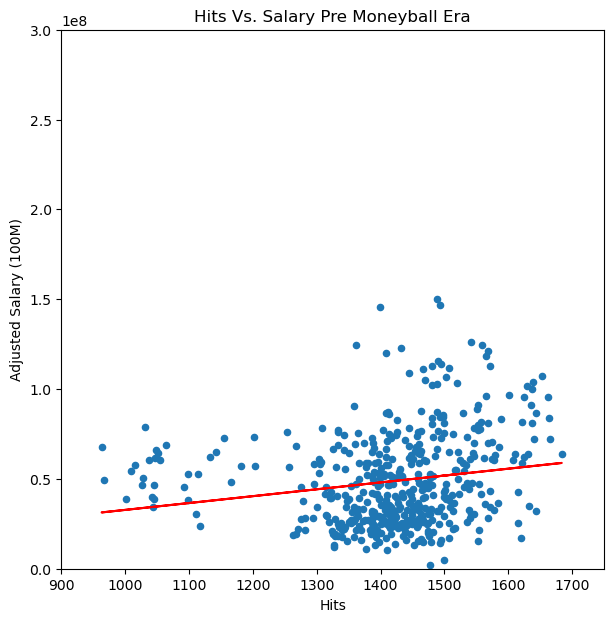

The r-squared is: 0.051318096199811244


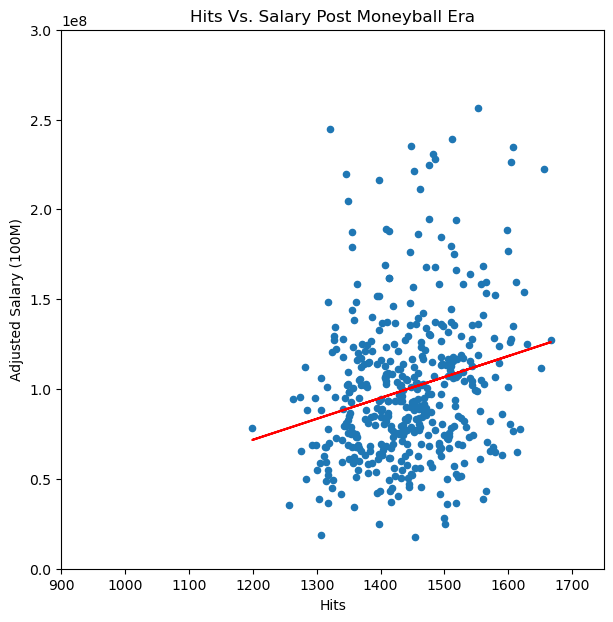

The r-squared is: 0.07738534191415278


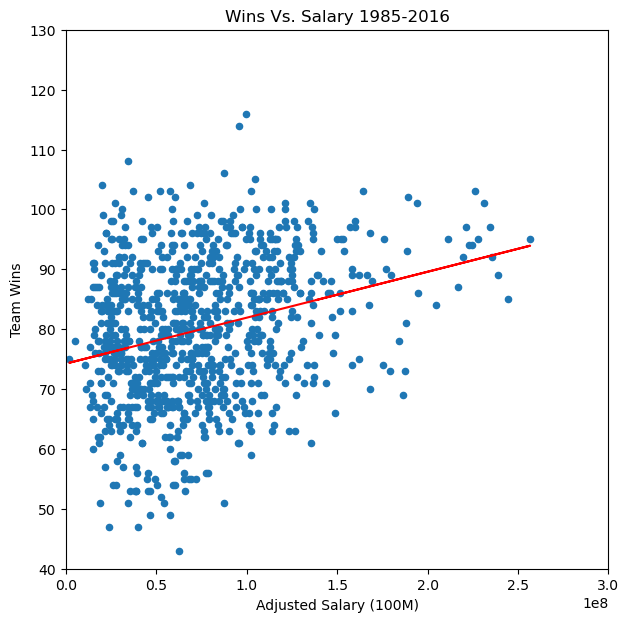

The r-squared is: 0.03145247630551077


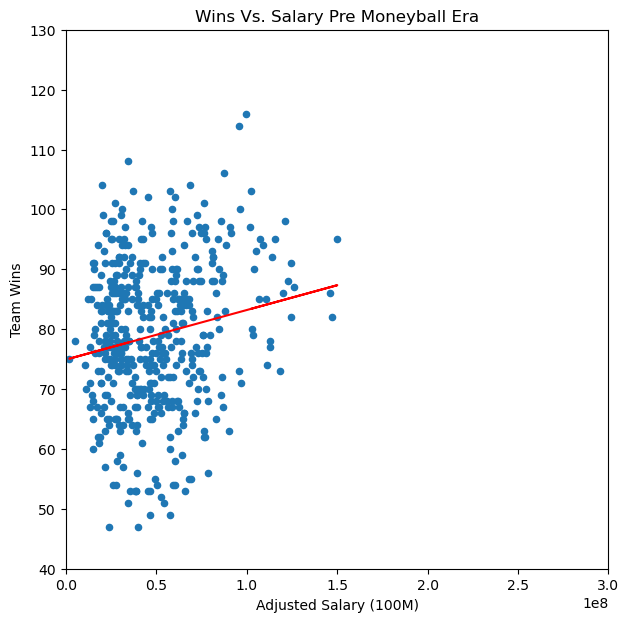

The r-squared is: 0.14672163105278171


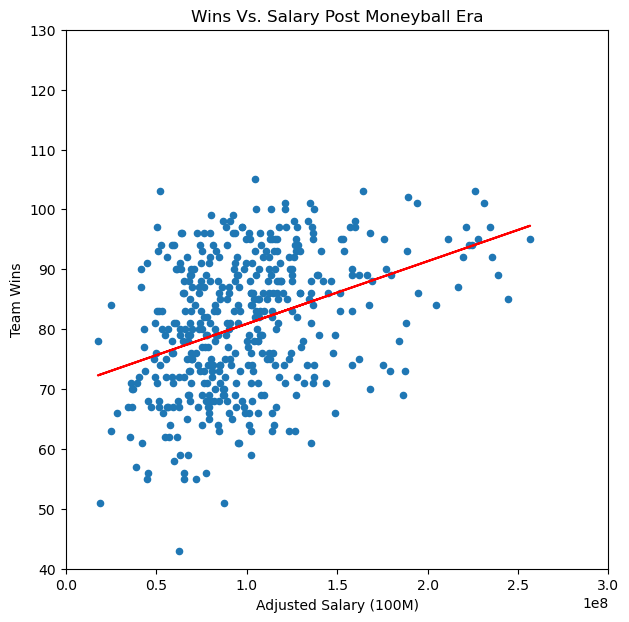

In [35]:
# Create scatter plots and linear regressions to discover correlation

salary_hits_pre.plot(kind="scatter", x="H", y="adjusted_salary", title="Hits Vs. Salary Pre Moneyball Era",
                     xlabel="Hits", ylabel="Adjusted Salary (100M)", figsize= (7,7), xlim=(900, 1750), ylim=(0, 300000000))
x_values = salary_hits_pre["H"]
y_values = salary_hits_pre["adjusted_salary"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/salary_hits_pre.png")
plt.show()

salary_hits_post.dropna(inplace=True)
salary_hits_post.plot(kind="scatter", x="H", y="adjusted_salary", title="Hits Vs. Salary Post Moneyball Era",
                      xlabel="Hits", ylabel="Adjusted Salary (100M)", figsize= (7,7), xlim=(900, 1750), ylim=(0, 300000000))
x_values_1 = salary_hits_post["H"]
y_values_1 = salary_hits_post["adjusted_salary"]
(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_values_1, y_values_1)
regress_values_1 = x_values_1 * slope_1 + intercept_1
plt.plot(x_values_1, regress_values_1, "r-")
print(f"The r-squared is: {rvalue_1**2}")
plt.savefig("Output/salary_hits_post.png")
plt.show()


salary_records.dropna(inplace=True)
salary_records.plot(kind="scatter", x="adjusted_salary", y="W", title="Wins Vs. Salary 1985-2016",
                    xlabel="Adjusted Salary (100M)", ylabel="Team Wins", figsize= (7,7), xlim=(0, 300000000), ylim=(40, 130))
x_values_2 = salary_records["adjusted_salary"]
y_values_2 = salary_records["W"]
(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = linregress(x_values_2, y_values_2)
regress_values_2 = x_values_2 * slope_2 + intercept_2
plt.plot(x_values_2, regress_values_2, "r-")
print(f"The r-squared is: {rvalue_2**2}")
plt.savefig("Output/salary_records_all.png")
plt.show()

salary_records_pre.plot(kind="scatter", x="adjusted_salary", y="W", title="Wins Vs. Salary Pre Moneyball Era",
                        xlabel="Adjusted Salary (100M)", ylabel="Team Wins", figsize= (7,7), xlim=(0, 300000000), ylim=(40, 130))
x_values_3 = salary_records_pre["adjusted_salary"]
y_values_3 = salary_records_pre["W"]
(slope_3, intercept_3, rvalue_3, pvalue_3, stderr_3) = linregress(x_values_3, y_values_3)
regress_values_3 = x_values_3 * slope_3 + intercept_3
plt.plot(x_values_3, regress_values_3, "r-")
print(f"The r-squared is: {rvalue_3**2}")
plt.savefig("Output/salary_records_pre.png")
plt.show()


# salary_records_post.dropna(inplace=True)
salary_records_post.plot(kind="scatter", x="adjusted_salary", y="W", title="Wins Vs. Salary Post Moneyball Era",
                         xlabel="Adjusted Salary (100M)", ylabel="Team Wins", figsize= (7,7), xlim=(0, 300000000), ylim=(40, 130))
x_values_4 = salary_records_post["adjusted_salary"]
y_values_4 = salary_records_post["W"]
(slope_4, intercept_4, rvalue_4, pvalue_4, stderr_4) = linregress(x_values_4, y_values_4)
regress_values_4 = x_values_4 * slope_4 + intercept_4
plt.plot(x_values_4, regress_values_4, "r-")
print(f"The r-squared is: {rvalue_4**2}")
plt.savefig("Output/salary_records_post.png")
plt.show()

In [15]:
#Import Team Home Runs Per Year

team_hr_df = pd.read_csv("Output/team_hr_year.csv")
team_hr_df.head()


,teamID,yearID,HR
0,CLE,1985,116
1,MON,1985,118
2,HOU,1985,121
3,ATL,1985,126
4,SDN,1985,109


In [37]:
# Find min and max values for plots

print(team_hr_df["HR"].min())
print(team_hr_df["HR"].max())

58
264


In [16]:
#Split Home Run records into pre and post Moneyball Dataframes

hr_records_pre = team_hr_df[(team_hr_df["yearID"]>1984) & (team_hr_df["yearID"]<2002)]
hr_records_post = team_hr_df[(team_hr_df["yearID"]>2001)]

In [18]:
#Merge Home Runs and Salaries

hr_salary_df = pd.merge(salary_df, team_hr_df, on=["yearID", "teamID"])
hr_salary_pre = pd.merge(salary_df, hr_records_pre, on=["yearID", "teamID"])
hr_salary_post = pd.merge(salary_df, hr_records_post, on=["yearID", "teamID"])
                                                        

The r-squared is: 0.12509341919684464


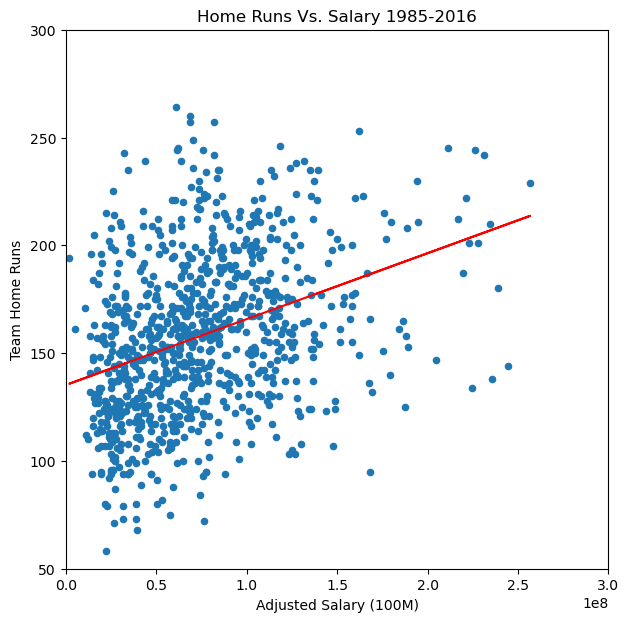

The r-squared is: 0.2001968380481899


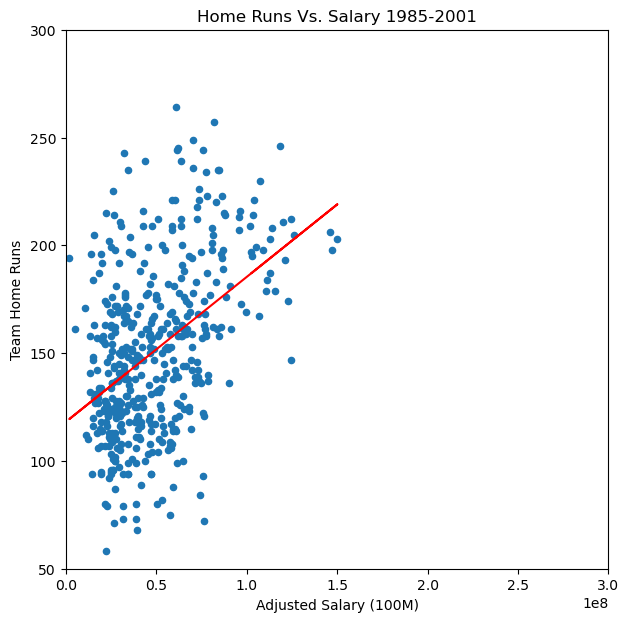

The r-squared is: 0.048973785123022306


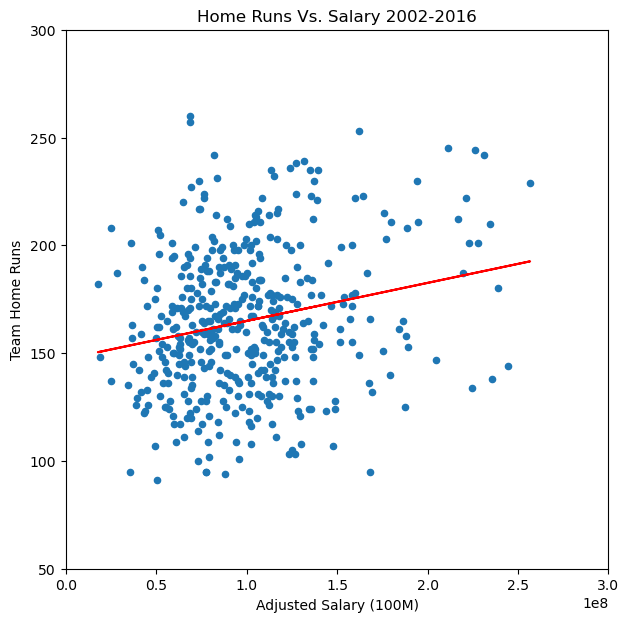

In [32]:
#Print scatter Plots and linear regressions to discover correlations

hr_salary_df.plot(kind="scatter", x="adjusted_salary", y="HR", title="Home Runs Vs. Salary 1985-2016",
                         xlabel="Adjusted Salary (100M)", ylabel="Team Home Runs", figsize= (7,7), xlim=(0, 300000000), ylim=(50, 300))
x_values_5 = hr_salary_df["adjusted_salary"]
y_values_5 = hr_salary_df["HR"]
(slope_5, intercept_5, rvalue_5, pvalue_5, stderr_5) = linregress(x_values_5, y_values_5)
regress_values_5 = x_values_5 * slope_5 + intercept_5
plt.plot(x_values_5, regress_values_5, "r-")
print(f"The r-squared is: {rvalue_5**2}")
plt.savefig("Output/hr_salary_all.png")
plt.show()

hr_salary_pre.plot(kind="scatter", x="adjusted_salary", y="HR", title="Home Runs Vs. Salary 1985-2001",
                         xlabel="Adjusted Salary (100M)", ylabel="Team Home Runs", figsize= (7,7), xlim=(0, 300000000), ylim=(50, 300))
x_values_6 = hr_salary_pre["adjusted_salary"]
y_values_6 = hr_salary_pre["HR"]
(slope_6, intercept_6, rvalue_6, pvalue_6, stderr_6) = linregress(x_values_6, y_values_6)
regress_values_6 = x_values_6 * slope_6 + intercept_6
plt.plot(x_values_6, regress_values_6, "r-")
print(f"The r-squared is: {rvalue_6**2}")
plt.savefig("Output/hr_salary_pre.png")
plt.show()

hr_salary_post.plot(kind="scatter", x="adjusted_salary", y="HR", title="Home Runs Vs. Salary 2002-2016",
                         xlabel="Adjusted Salary (100M)", ylabel="Team Home Runs", figsize= (7,7), xlim=(0, 300000000), ylim=(50, 300))
x_values_7 = hr_salary_post["adjusted_salary"]
y_values_7 = hr_salary_post["HR"]
(slope_7, intercept_7, rvalue_7, pvalue_7, stderr_7) = linregress(x_values_7, y_values_7)
regress_values_7 = x_values_7 * slope_7 + intercept_7
plt.plot(x_values_7, regress_values_7, "r-")
print(f"The r-squared is: {rvalue_7**2}")
plt.savefig("Output/hr_salary_post.png")
plt.show()

In [27]:
#Merge Home Runs and Wins

hr_wins_df = pd.merge(team_records_df, team_hr_df, on=["yearID", "teamID"])
hr_wins_pre = pd.merge(team_records_df, hr_records_pre, on=["yearID", "teamID"])
hr_wins_post = pd.merge(team_records_df, hr_records_post, on=["yearID", "teamID"])

The r-squared is: 0.13457794522491964


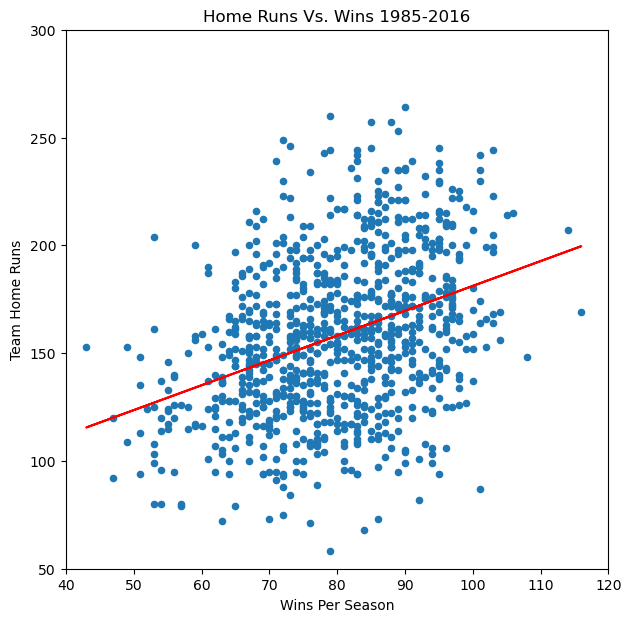

The r-squared is: 0.1148019880144618


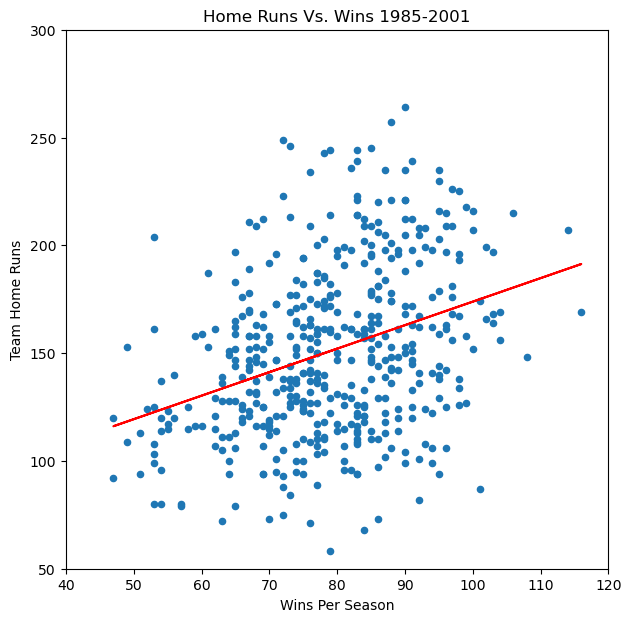

The r-squared is: 0.14838565075331178


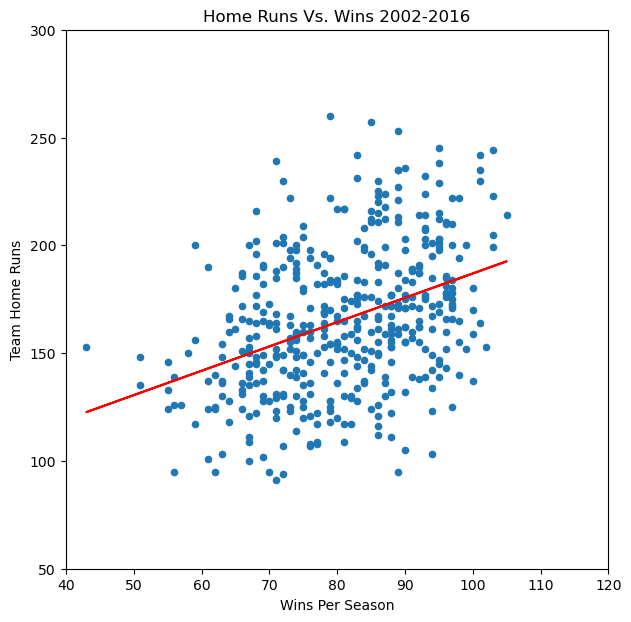

In [33]:
#Print scatter plots and linear regressions to discover correlations

hr_wins_df.plot(kind="scatter", x="W", y="HR", title="Home Runs Vs. Wins 1985-2016",
                         xlabel="Wins Per Season", ylabel="Team Home Runs", figsize= (7,7), xlim=(40, 120), ylim=(50, 300))
x_values_8 = hr_wins_df["W"]
y_values_8 = hr_wins_df["HR"]
(slope_8, intercept_8, rvalue_8, pvalue_8, stderr_8) = linregress(x_values_8, y_values_8)
regress_values_8 = x_values_8 * slope_8 + intercept_8
plt.plot(x_values_8, regress_values_8, "r-")
print(f"The r-squared is: {rvalue_8**2}")
plt.savefig("Output/hr_wins_all.png")
plt.show()

hr_wins_pre.plot(kind="scatter", x="W", y="HR", title="Home Runs Vs. Wins 1985-2001",
                         xlabel="Wins Per Season", ylabel="Team Home Runs", figsize= (7,7), xlim=(40, 120), ylim=(50, 300))
x_values_9 = hr_wins_pre["W"]
y_values_9 = hr_wins_pre["HR"]
(slope_9, intercept_9, rvalue_9, pvalue_9, stderr_9) = linregress(x_values_9, y_values_9)
regress_values_9 = x_values_9 * slope_9 + intercept_9
plt.plot(x_values_9, regress_values_9, "r-")
print(f"The r-squared is: {rvalue_9**2}")
plt.savefig("Output/hr_wins_pre.png")
plt.show()

hr_wins_post.plot(kind="scatter", x="W", y="HR", title="Home Runs Vs. Wins 2002-2016",
                         xlabel="Wins Per Season", ylabel="Team Home Runs", figsize= (7,7), xlim=(40, 120), ylim=(50, 300))
x_values_10 = hr_wins_post["W"]
y_values_10 = hr_wins_post["HR"]
(slope_10, intercept_10, rvalue_10, pvalue_10, stderr_10) = linregress(x_values_10, y_values_10)
regress_values_10 = x_values_10 * slope_10 + intercept_10
plt.plot(x_values_10, regress_values_10, "r-")
print(f"The r-squared is: {rvalue_10**2}")
plt.savefig("Output/hr_wins_post.png")
plt.show()